In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [7]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [8]:
##Data preprocessing
data.shape


(7920, 3)

In [71]:
### Text Preprocessing
import re
import string


convert uppercase to lowercase

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [20]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [26]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [28]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 505.0 kB/s eta 0:00:00
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 653.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 787.7 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 901.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 833.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 892.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.5 MB 927.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 886.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 912.8 kB/s eta 0:00:02
   --------- -


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import nltk

In [30]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [33]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [34]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming


In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [37]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [38]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building vacablary


In [39]:
from collections import Counter
vocab = Counter()

In [40]:
vocab

Counter()

In [41]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [42]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [43]:
len(vocab)

15949

In [44]:
data.shape

(7920, 3)

In [45]:
tokens = [key for key in vocab if vocab[key] > 10]

In [46]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [47]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

##Divide dataset

In [48]:
X = data['tweet']
y = data['label']

In [50]:
X


0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [52]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [53]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 543.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/10.9 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/10.9 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.9 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.9 MB 353.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/10.9 MB 353.1 kB/s eta 0:00:31
   -


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   --- ------------------------------------ 4.2/44.5 MB 244.0 kB/s eta 0:02:46
   --- ------------------------------------ 4.2/44.5 MB 244.6 kB/s eta 0:02:45
   --- ------------------------------------ 4.2/44.5 MB 245.4 kB/s eta 0:02:45
   --- ------------------------------------ 4.3/44.5 MB 246.5 kB/s eta 0:02:44
   --- ------------------------------------ 4.3/44.5 MB 246.8 kB/s eta 0:02:44
   --- ------------------------------------ 4.3/44.5 MB 247.9 kB/s eta 0:02:43
   --- ------------------------------------ 4.3/44.5 MB 248.6 kB/s eta 0:02:42
   --- ------------------------------------ 4.4/44.5 MB 249.7 kB/s eta 0:02:41
   --- ------------------------------------ 4.4/44.5 MB 250.8 kB/s eta 0:02:40
   --- ------------------------------------ 4.4/44.5 MB 251.7 kB/s eta 0:02:40
   ---- ----------------------------------- 4.5/44.5 MB 252.6 kB/s eta 0:02:39
   ---- ----------------------------------- 4.5/44.5 MB 254.4 kB/s eta 0:02:38
   ---- ----------------------------------- 4.5/44.5

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train

2136       steve job wiki page say he dead sad true still
1889    baddiel think annoyingfrustr appl product issu...
4756    iknow look followfollow likelik help steam gam...
5922    new phone chang gusto mo ba khlari xyril happi...
3041    sillyfac facetim boy even though one room away...
                              ...                        
7530    im get macbook air saturday bitch suck non exi...
6608    weather morningwhat like appl io app accur ins...
1402    gain follow rt must follow follow back follow ...
3908    wow imessag stop work cant text like kind peas...
6063    know largest appl ever pick weigh pound health...
Name: tweet, Length: 6336, dtype: object

In [57]:
X_test

3758    rome cittàitali iphon instafood infoodwetrust ...
1380                  nicolemari hate mine load fml iphon
3453          set io watch wwdc readi gorgeou monday appl
4522    go back iphon see fund ad account … workonlin ...
1535    would like wish amaz day make everi minut coun...
                              ...                        
5050    gamerscomplain that get samsung bend throw wal...
4004    satisfi custom pricelessswitch costum switch v...
5371    smoke injuri rsclub iphon iphonesplu rsclubmov...
2666                   im come game soni ps cod bo fp new
7532    soffici japan beauti like iphon ipad cute wow ...
Name: tweet, Length: 1584, dtype: object

In [58]:
y_train

2136    1
1889    1
4756    0
5922    0
3041    0
       ..
7530    0
6608    0
1402    0
3908    1
6063    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [60]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [61]:
vectorized_x_train = vectorizer(X_train, tokens)

In [64]:
vectorized_x_test = vectorizer(X_test, tokens)

In [65]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_train

2136    1
1889    1
4756    0
5922    0
3041    0
       ..
7530    0
6608    0
1402    0
3908    1
6063    0
Name: label, Length: 6336, dtype: int64

In [67]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_test

3758    0
1380    1
3453    0
4522    0
1535    0
       ..
5050    0
4004    0
5371    0
2666    0
7532    0
Name: label, Length: 1584, dtype: int64

In [69]:
y_train.value_counts()

label
0    4696
1    1640
Name: count, dtype: int64

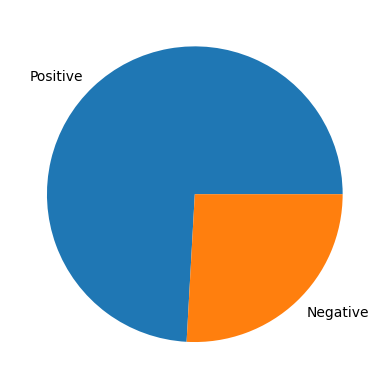

In [70]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [72]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 660.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 495.5 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 660.6 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 554.9 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.3 kB 525.1 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.3 kB 525.1 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 459.5 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 427.9 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/258.3 kB 413.5 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/258.3 kB 413.5 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/2


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9392, 1145) (9392,)


In [74]:
y_train_smote.value_counts()

label
1    4696
0    4696
Name: count, dtype: int64

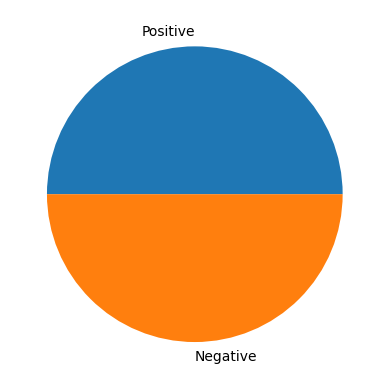

In [75]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [76]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [77]:
y_train_smote

0       1
1       1
2       0
3       0
4       0
       ..
9387    1
9388    1
9389    1
9390    1
9391    1
Name: label, Length: 9392, dtype: int64

In [78]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
y_test

3758    0
1380    1
3453    0
4522    0
1535    0
       ..
5050    0
4004    0
5371    0
2666    0
7532    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [82]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.918
	Recall = 0.971
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.878
	Precision = 0.706
	Recall = 0.852
	F1-Score = 0.772


### Naive Bayes

In [83]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.87
	Recall = 0.954
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.874
	Precision = 0.674
	Recall = 0.933
	F1-Score = 0.783


### Decision Tree

In [84]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.838
	Precision = 0.672
	Recall = 0.658
	F1-Score = 0.665


### Random Forest

In [85]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.871
	Precision = 0.736
	Recall = 0.736
	F1-Score = 0.736


### Support Vector Machine

In [86]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.981
	Precision = 0.966
	Recall = 0.996
	F1-Score = 0.981
Testing Scores:
	Accuracy = 0.882
	Precision = 0.732
	Recall = 0.813
	F1-Score = 0.771


In [87]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)